<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=100x77 at 0x118663DD8>


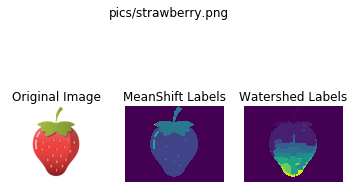

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=100x56 at 0x1096F7A20>


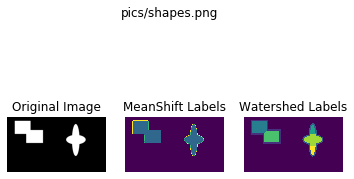

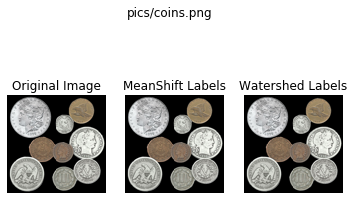

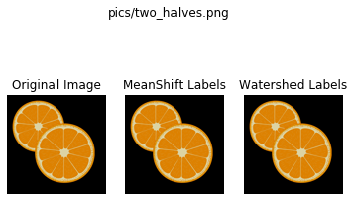

In [2]:
"""
COMP9517 Lab 03, Week 4
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
import cv2
from PIL import Image

size = 100, 100

img_names = ["pics/strawberry.png", "pics/shapes.png"]
ext_names = ["pics/coins.png", "pics/two_halves.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()

for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]

    #
    # +--------------------+
    # |     Question 1     |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    b,g,r = cv2.split(img_mat)
    shape=b.shape
    b=b.ravel()
    g=g.ravel()
    r=r.ravel()
    # Step 2 - Combine the three colour channels by flatten each channel 
	# then stacking the flattened channels together.
    # This gives the "colour_samples"
    colour_samples = []
    colour_samples=np.stack((b,g,r)).T
    # Step 3 - Perform Meanshift  clustering
    #
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)
#     print(colour_samples.shape)
    # Step 4 - reshape ms_labels back to the original image shape 
	# for displaying the segmentation output 
    ms_labels=ms_labels.reshape(shape)
    #%%
    #
    # +--------------------+
    # |     Question 2     |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_array = []
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_ = np.array(img)[:, :, :3]
    img_array=cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = []
    distance=ndi.distance_transform_edt(img_array)
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    markers = []
    local_maxi=peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=img_array)
    markers = ndi.label(local_maxi)[0]
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = []
    ws_labels = watershed(-distance, markers, mask=img_array)
    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")
    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")

#%%
#
# +-------------------+
# |     Extension     |
# +-------------------+
#
# Loop for the extension component
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)


    # TODO: perform meanshift on image
    ms_labels = img  # CHANGE THIS

    # TODO: perform an optimisation and then watershed on image
    ws_labels = img  # CHANGE THIS

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")
